# Machine Learning Approach to Alpha Market Groupings

<li> Unsupervised clustering groups together different items based on similarities without knowing what their 'true' category is. </li>
<li> Usupervised learning can help show similarities within observations in the data that may not be immediately obvious through elementary analysis or visualizations. </li>
<li> The two unsupervised clustering approaches used here are <b>Hierarchial Agglomerative Clustering</b> and <b>K-Means Clustering</b> </li>
<ul> 
  <li> Agglomerative clustering is a 'bottom-up' approach, and starts with each observation as its own cluser and then works to group the individual clusters into larger clusters. </li> 
  <li> K-Means clustering is a partitional clustering approach, meaning it partitions the data and alogirthmically modifies the clusters to minimize the variation within the clusters. This is a great approach for large data sets, and computationally more efficient than many forms of hierarchial clustering. </li>
</ul>

### Algorithms Explained:

#### Hierarchial Clustering:

<li><b>Step 1:</b> All observations are their own, individual, clusters.</li>
<li><b>Step 2:</b> Some distance metric (e.g. Euclidean distance) is determined.</li>
<li><b>Step 3:</b> The two observations closest together are grouped together in a new cluster.</li>
<li><b>Step 4:</b> The processs is repeated for the N observations, until all observations are added into the cluster.</li>
<li><b>Step 5:</b> A dendrogram is a visualization that plots merging of the individual observations into the single cluster. It shows the path from leaves to the single cluster, and shows the various branch points throughout.</li>
<li><b>Step 6:</b> A cutoff point can be determined on the dendrogram, which will decide the final number of clusers. </li>

#### K-Means Clustering:

<li><b>Step 1:</b> All observations are their own, individual, clusters.</li>
<li><b>Step 2:</b> Some distance metric (e.g. Euclidean distance) is determined.</li>
<li><b>Step 3:</b> The final number of clusters desired is prespecified. </li>
<li><b>Step 4:</b> If we want k clusters, k observations are chosen, at random, to be the centroids of each of the k clusters.</li>
<li><b>Step 5:</b> The centers of each of the k clusters are the redetermined.</li>
<li><b>Step 6:</b> Each observation is reassigned to the cluster whose centroid they are closest to.</li>
<li><b>Step 7:</b> This process is repeated until the algorithm converges, or at which point all of the observations appear to be in the closest possible centroid.</li>

In [1]:
"""
Created on Fri Dec 20 11:09:33 2019

@author: alexandra.rotondo
"""
import pyodbc
import pandas as pd
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import warnings

###################################
warnings.filterwarnings("ignore")
random.seed(555)
sb.set(style="darkgrid")
###################################

#### Functions

In [45]:
#######
#functions
#######

def get_data_frame(dataset):
    MARKETS = unique(dataset)
    INIT = []
    ROC_75 = []
    ROC_25 = []
    #VAC = []

    problems = []

    for mkt in MARKETS:
        if(not math.isnan(f(75, str(mkt), data))):
            INIT.append(f(75, str(mkt), data))
            ROC_75.append(fp(75, str(mkt), 50, data))
            ROC_25.append(fp(25, str(mkt), 25, data))
            #VAC.append(vacation(str(mkt)))
        else:
            problems.append(str(mkt))
            
    MARKETS = clean(MARKETS, list(set(problems)))

    CLASS = np.repeat(0, len(MARKETS))
    df = pd.DataFrame(CLASS)
    df['ALPHAMKT'] = MARKETS
    df['INIT'] = INIT
    df['ROC_75_TO_25'] = ROC_75
    df['ROC_25_TO_DPT'] = ROC_25
    #df['VACATION_INDICATOR'] = VAC
    df = df[['ALPHAMKT', 'INIT', 'ROC_75_TO_25', 'ROC_25_TO_DPT']]
    return(df)

def clean(data, subset):
    output = []
    for mkt in data:
        if mkt not in subset:
            output.append(str(mkt))
    return(output)

def get_min_AP(mkt):
    subset = data[data.ALPHAMKT == str(mkt)]
    return(-1*max(subset['DTD']))

def get_max_AP(mkt):
    subset = data[data.ALPHAMKT == str(mkt)]
    return(-1*min(subset['DTD']))

#vacation_hubs = ['MCO', 'LAS', .. etc] #this could also be generated in a csv file and read in separately

#def vacation(market):
#    if 'MCO' in str(market):
#        return(1)
#    elif 'LAS' in str(market):
#        return(1)
#    else:
#        return(0)

def unique(data): #get unique elements from object data
    unique_markets = []
    for mkt in data['ALPHAMKT']:
        if str(mkt) in unique_markets:
            pass
        else:
            unique_markets.append(str(mkt))
    return(unique_markets)

def f(h, alpha, data):   #returns the LDF_BKD for a specific market at h days prior to departure date
    subset = data[data.ALPHAMKT == str(alpha)]
    rez = subset[subset.DTD == -1*h]
    return(np.average(rez.LDF_BKD))

def fp(h, alpha, delta, data): #first derivative
    p1 = f(h, alpha, data)
    p2 = f(h - delta, alpha, data)
    return((p2-p1)/delta)

def fpp(h, alpha, delta, data): #second derivate
    p3 = fp(h, alpha, delta, data)
    p4 = fp(h - delta, alpha, delta, data)
    return((p4-p3)/delta)

#### SQL Pull:

In [3]:
# -*- coding: utf-8 -*-
print('Starting @ : {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())) 

SQL_FILE = 'fullquery2.txt'
TRAINING_MARKETS = 'bcurvesquery.txt'

print("Executing Snapshot query...")

conn = pyodbc.connect(
    r'DRIVER={SQL Server Native Client 11.0};'
    r'SERVER=FDCSQLCE04P;'
    r'DATABASE=RM_REPORTS;'
    r'Trusted_Connection=yes;'
    )

with open(SQL_FILE, 'r') as myfile:
    sql = myfile.read().replace('\n',' ')

data = pd.read_sql(sql,conn)
data['DTD'] = -1*data['DTD']

with open(TRAINING_MARKETS, 'r') as myfile:
    sql = myfile.read().replace('\n',' ')

train_data = pd.read_sql(sql, conn)
train_data['DTD'] = -1*train_data['DTD']

print("Finished Query")

Starting @ : 2020-01-23 08:40:39
Executing Snapshot query...
Finished Query


## Exploring Model Market Behavior:

Text(0.5, 1.0, 'All Markets')

<Figure size 432x288 with 0 Axes>

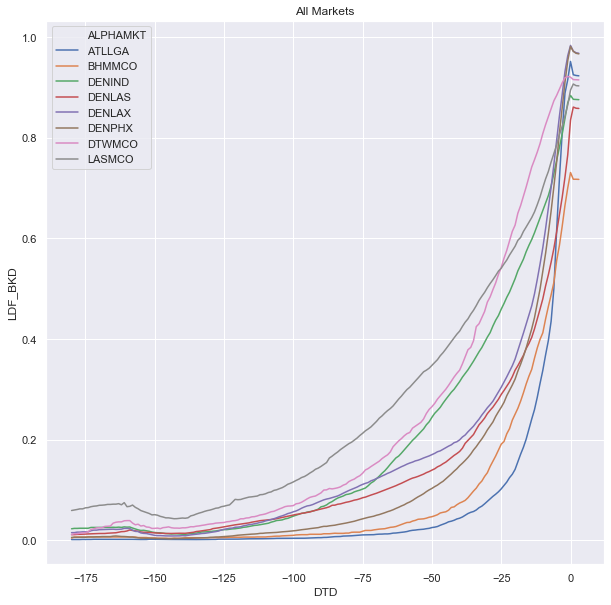

In [4]:
plt.clf()
plt.figure(figsize=(10, 10))  
sb.lineplot(x='DTD', y='LDF_BKD', hue='ALPHAMKT', data=train_data).set_title("All Markets")

### Comments:

<li>Certain markets have, on average, different booking patterns than others.</li>
<li>Notable points along the booking curves that differ across markets are the load factor at 75 days out, the rate of change in bookings from 75 to 25 DTD, and the rate of change in bookings from 25 days to the departure date.</li>
<li>If we average a market's behavior for all AP options, can we separate the booking curves into distinct clusters based on the parameters mentioned above?</li>
<ul><li>If so, this can help to draw generalizations upon markets that behave similarly.</li>
    <li>This can also help for more effective pricing, marketing/promotion, and fare shifting across different markets that behave similarly.</li></ul>

## Condensing Data:

<li>Since the full data pulls for a full year, each market will have multiple LDF values for a given AP value.</li>
<li>This <b>averages</b> all available LDF values for a market for a given AP (DTD) value.</li>
<ul><li>The median value could also be used, as that value ignores extremes. So, if a market booked poorly one month but tends to book much better on average, the median wouldn't be influenced by the month of poor booking.</li>
    <li>Since we have little data, on the whole, regarding each market, the average was used.</li>
</ul>

In [5]:
mkts = pd.Series(list(set(data.ALPHAMKT))).sort_values(ascending=True)

li = [] 
for mkt in mkts:
    temp = data[data.ALPHAMKT == str(mkt)].groupby('DTD').mean()
    df = pd.DataFrame(np.repeat(str(mkt), len(temp.index.values)), temp['LDF_BKD'])
    df['DTD'] = temp.index.values
    li.append(df)

final = pd.concat(li).reset_index()
final.columns = ['LDF_BKD', 'ALPHAMKT', 'DTD']
final = final[['ALPHAMKT', 'DTD', 'LDF_BKD']]

## All Booking Curves:

<li>All markets, with their LDF averaged for each DTD value, are plotted below.</li>

Text(0.5, 1.0, 'All Markets')

<Figure size 432x288 with 0 Axes>

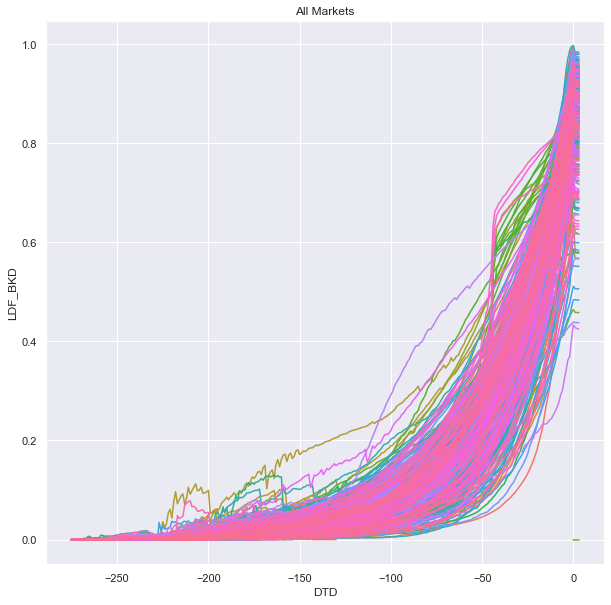

In [6]:
########
sb.set(style="darkgrid")
########

plt.clf()
plt.figure(figsize=(10, 10))  
sb.lineplot(x='DTD', y='LDF_BKD', hue='ALPHAMKT', data=final, legend=False).set_title("All Markets")

* We can see that there exists different behaviors in markets once AP <= 75
* <b>Goal</b>: can we identify the behavior of a market based on the rate of change from AP = 75 to AP = 25, and the LDF at 75 days out?

## Exploring Market Variance:

<li>The following section plots specific booking curves as a time series.</li>
<li>The hue padding the actual curve reflects the variance in the booking factor for that market at each day.</li>
<li>Ideally, you want to see little variance (equivalently, very little padding)</li>
<li>The core goal of this section is to identify markets with large degrees of variance that could potentially belong in multiple categories, if that is an issue.</li>
<li><b>Orlando and Vegas markets are explored specifically, but 'MCO' can be changed to 'ABCDEF' to see the variance in a specific alpha market.</b></li>

### MCO Variance: 

In [10]:
##################################
'''
    This is time-consuming. 
    Skip unless necesarry.
'''
##################################

MCO_MARKETS = set()

for mkt in data['ALPHAMKT']:
    if 'MCO' in str(mkt):
        MCO_MARKETS.add(str(mkt))
        
MCO_MARKETS = list(MCO_MARKETS)

frames = []
for mkt in MCO_MARKETS:
    df = data[data.ALPHAMKT == str(mkt)]
    frames.append(df)

MCO_DATA = pd.concat(frames)

<Figure size 432x288 with 0 Axes>

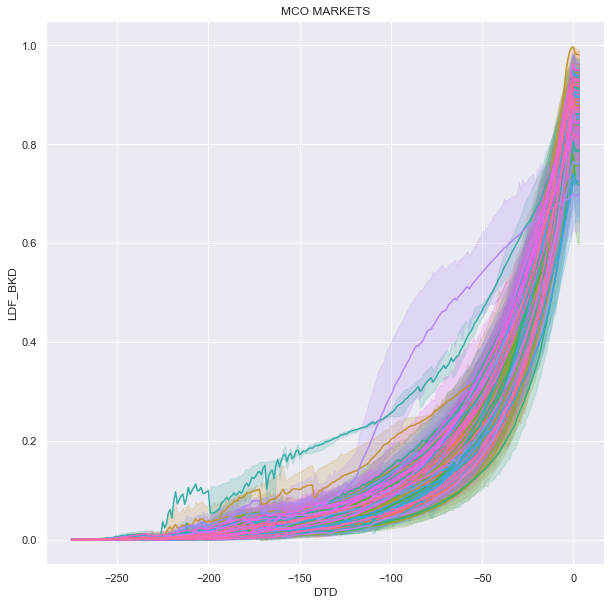

In [11]:
plt.clf()
plt.figure(figsize=(10, 10))  
fig = sb.lineplot(x='DTD', y='LDF_BKD', hue='ALPHAMKT', data=MCO_DATA, legend=False)
fig = fig.set_title("MCO MARKETS")

### Comments:

<li>Mostly, markets have little variance!</li>
<li>Some markets do have larger variance, but those markets will only ever be in one specific category.</li>

### LAS Effect

In [61]:
##################################
'''
    This is time-consuming. 
    Skip unless necesarry.
'''
##################################

LAS_MARKETS = set()

for mkt in data['ALPHAMKT']:
    if 'LAS' in str(mkt):
        LAS_MARKETS.add(str(mkt))
        
LAS_MARKETS = list(LAS_MARKETS)

frames = []
for mkt in LAS_MARKETS:
    df = data[data.ALPHAMKT == str(mkt)]
    frames.append(df)

LAS_DATA = pd.concat(frames)

<Figure size 432x288 with 0 Axes>

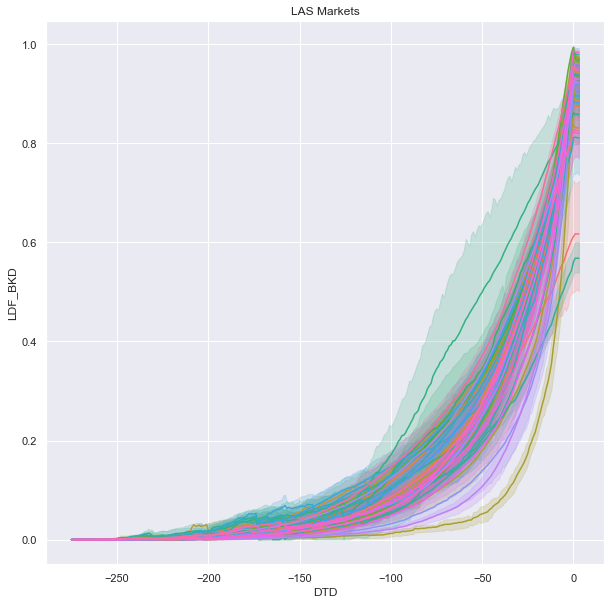

In [62]:
plt.clf()
plt.figure(figsize=(10, 10))  
fig = sb.lineplot(x='DTD', y='LDF_BKD', hue='ALPHAMKT', data=LAS_DATA, legend=False)
fig = fig.set_title("LAS Markets")

In [ ]:
#weird market is CUNLAS

### Derivative Function Validation: Ignore, Unless Running Notebook

#### Instructions if Running Notebook:

<li><b>Step 1:</b> Make sure that all blocks of code have been run prior to running the bits below.</li>
<li><b>Step 2:</b> Run the bits below. If they don't throw errors, then everything is done, and you can move onto the other blocks of code.</li>
<li><b>Step 3:</b> If they do throw errors, re-run the second chunk of code (the <b>FUNCTIONS</b> block), and then re-run the bits below. Everything should be fine now!</li>

In [12]:
p1= f(100, 'DTWMCO', data)
p1

0.1405781575114213

In [13]:
print(fpp(100, 'DTWMCO', 20, data))

4.58610787136623e-05


* they work!

## Classification Options:

### Parameters:

<ul>
    <li>1. <b>INIT</b>: Represents the first available LDF*FARE (interaction) value for a specific market.</li>
    <li>2. <b>ROC_75_TO_25</b>: Represents the rate of change in LDF*FARE (interaction) from 75 DTD to 25 DTD.</li>
    <li>3. <b>ROC_25_TO_DPT</b>: Represents the rate of change in LDF*FARE (interaction) from 25 DTD to 0 DTD.</li>
</ul>

<li> Below, we explore a rudimentary form of classification, case-when, and then explore higher-level approaches (hierarchial agglomerative and K-Means).</li>

In [14]:
#Populates the data frame containing the parameters for each of the alpha markets
df_full = get_data_frame(final)
df_full.head()

,ALPHAMKT,INIT,ROC_75_TO_25,ROC_25_TO_DPT
0,ABQAUS,0.073989,0.004444,0.014524
1,ABQDEN,0.094699,0.004348,0.024725
2,ABQMCO,0.133166,0.005850,0.013575
3,ABQSAT,0.064198,0.005577,0.011960
4,ALBDEN,0.153493,0.007358,0.014139


### Case-When Classification

<ul>
    <li>Most basic form of grouping/classification.</li>
    <li>Classifies markets based on their LDF_BKD value 25 days out from departure.</li>
    <li>Pros:</li>
    <ul>
        <li>1. Easily interpretable</li>
        <li>2. Easily modifable</li>
    </ul>
    <li>Cons:</li>
    <ul>
        <li>1. Inherently biased, as it relies on 'eye-balling' to create decision boundaries.</li>
        <li>2. Better suited for situations when at most one parameters is being used to decide groupings.</li>
        <li>3. Loses reliability when multiple parameters are incorporated and more decision boundaries are made arbitrarily.</li>
    </ul>
</ul>

In [15]:
PRED_CLASS = np.repeat(0, len(df_full))
i = 0
for mkt in df_full['ALPHAMKT']:
    if (f(25, str(mkt), data) <= .3):
        PRED_CLASS[i] = 3
    elif (f(25, str(mkt), data)  > .3 and f(25, str(mkt), data) <= .45):
        PRED_CLASS[i] = 2
    else:
        PRED_CLASS[i] = 1
    i += 1
    
df_full['CASE_WHEN_PRED'] = PRED_CLASS

In [17]:
pd.Series(PRED_CLASS).value_counts() #everything should sum to len(df_full)

1    241
2    164
3     26
dtype: int64

### Visualizing Booking Curves via Behavior Category determined by Case-When Classification

<Figure size 432x288 with 0 Axes>

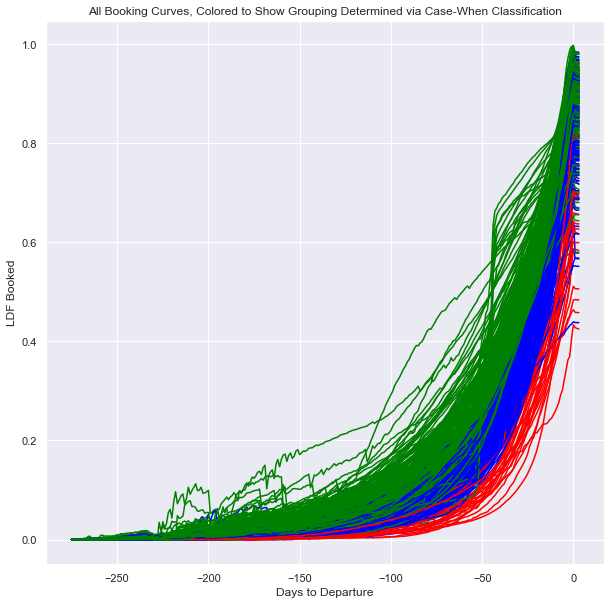

In [18]:
plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['CASE_WHEN_PRED'].array[0]
        if 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 3 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')         
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via Case-When Classification")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

### Comments:

<li>Overall, this achieves the goal: it partitions the markets into three (3) categories based primarily on the rate of change from 75 days out to 25 days out.</li>
<li>This method is inherently subjective, but easily understood and modifiable.</li>
<li>With the chosen cut-off points, this creates somewhat biased classes. The majority of the markets follow a vacation-booking pattern, in that the majority of the bookings happen farther out from departure and the rate of bookings tapers off as the departure date approaches.</li>
<li>In the sections below, more algorithmic approaches to classifying the market behavior are implemented and explored.</li>

## Hierarchial Agglomerative Clustering (with Dendrograms)

<ul>
    <li>Hierarchial clustering is a type of unsupervised items, and is used to partition data sets when subgroups/clusters are believed to exist, but it is unknown which group a specific observation within the data truly belongs to.</li>
    <li>Works by grouping markets together until one cluster containing all observations is achieved.</li>
    <li>The user can then decide how many clusters they want to represent their data based on the results of the dendrogram.</li>
    <li>HAC can be used on its own, or as part of an exploratory data analysis to help construct a predictive model.</li>
    <li>The parameters used in this model are defined above.</li>
    <li>Pros:</li>
    <ul>
        <li>1. Alogrithmic/scientific approach to grouping.</li>
        <li>2. Algorithmic approaches can catch idiosyncracies of data they may not be self-evident.</li>
        <li>3. Dendogram can provide useful information about how interrelated different markets are.</li>
    </ul>
    <li>Cons:</li>
    <ul>
        <li>1. Purpose is grouping, not prediction. More data from different departments is needed to construct a model with predictive value.</li>
        <li>2. User must decide the final number of clusters, which indicates that a robust understanding of the data and markets may be needed to make an effective decision.</li>
    </ul>
</ul>

In [19]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram

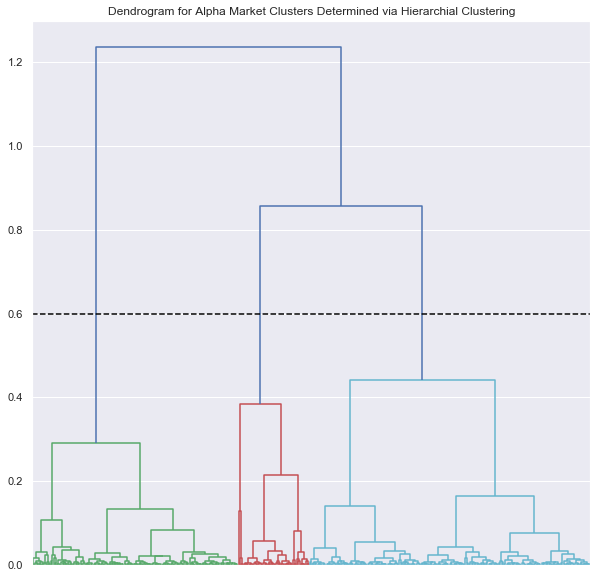

In [20]:
plt.figure(figsize=(10, 10))  
plt.title("Dendrogram for Alpha Market Clusters Determined via Hierarchial Clustering")
plt.axhline(y=.6, color="black", ls="--")
dend = shc.dendrogram(shc.linkage(df_full.iloc[:,1:4], method='ward'), color_threshold=.6, no_labels=True) 

### Interpreting the Dendrogram:

<ul>
    <li>The dendrogram shows the merging map of each individual market into larget clusters.</li>
    <li>The bottom leaves of the graph correspond to individual Alpha Markets.</li>
    <li>The vertical lines show the connection between a smaller cluster and a parent cluster, and therefore indicate similarity between the groups.</li>
    <ul>
        <li>How much similarity will depend on the data</li>
    </ul>
    <li>Horizontal distance between two child clusters <b>does not</b> indicate any similarities between the two child clusters.</li>
    <ul>
        <li>Though they ended up as part of the same parent cluster, since all of the observations are eventually merged into one cluster, there is no way to quanitfy how different the two child clusters were prior to their merging.</li>
    </ul> 
    <li>Therefore, horizontal distance is entirely ignored as a measure of any sort of similarity between groups.</li>
    <li>How many clusters that are used to represent the data is a subjective choice that is determined by selecting a cut-off point on the y-axis.</li> 
    <ul>
    <li>This horizontal line is drawn, and the number of splits above and down to the line is the number of clusters.</li>
</ul>
    <li>In this instance, since the goal is to identify three groups of market behavior, the cut off point used is .6. Above the line y=.6, there are 3 splits, corresponding to three overall clusters.</li>
</ul>

### Visualizing the Booking Curves with their Corresponding Behavior Category

In [21]:
colors = pd.Series(dend['color_list']).apply(str)
index = pd.Series(dend['ivl']).apply(int)
labels = np.repeat(0, len(df_full))

j=0
for j in range(0, len(df_full)):
    try:
        if (colors[j] == 'g'):
            labels[index[j]] = 0
        elif (colors[j] == 'r'):
            labels[index[j]] =1
        elif (colors[j] == 'c'):
            labels[index[j]] =2
        else:
            labels[index[j]] =3
    except KeyError:
        labels[index[j]] = -1
        
df_full['H_CL_PRED'] = labels

<Figure size 432x288 with 0 Axes>

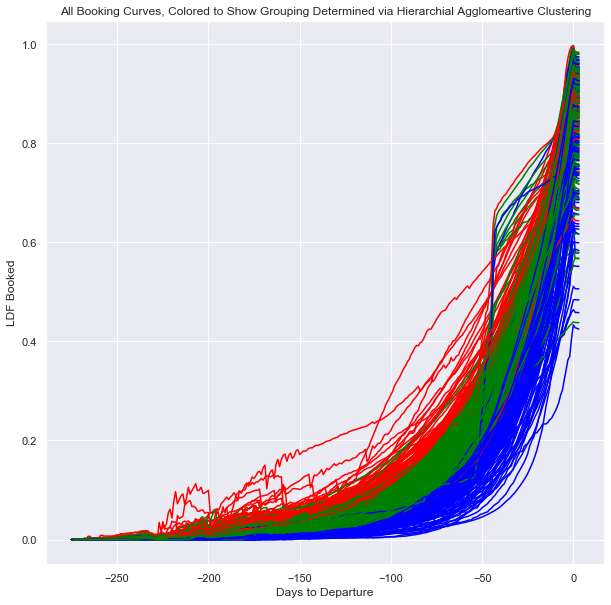

In [27]:
plt.clf()
plt.figure(figsize=(10, 10))  

for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['H_CL_PRED'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif -1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='white')
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via Hierarchial Agglomeartive Clustering")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

### Comments:

<li>The colorized graph shows the presence of three mostly non-overlapping groups!</li>
<li>This is good, because if we got a graph where the groups were not distinct, that would indicate that the method used wasn't the most effective.</li>
<li>Additionally, the groups correspond to the booking patterns we know to exist throughout different markets!</li>
<li>This method should be compared to another unsupervised method in order to verify that it's working correctly, and that the results remain relatively consistent across other available methods with similar goals.</li>

### K-Means Clustering of Alpha Markets

<ul>
    <li>K-Means is an unsupervised clustering alogrithm that works to create distinct clusters of data observations by partitioning the data until clusters with minimal inner-centroid variance are achieved. Equivalently, the alogirthm stops when the groups have the strongest amounts of similarity.</li>
    <li>HAC works to merge the data together in order of similarity, while K-Means works by starting with the data as one whole cluster and partitioning it into groups.</li>
    <ul>
        <li>HAC is a bottom-up approach.</li>
        <li>K-Means is a top-down approach.</li>
    </ul>
    <li>Pros:</li>
    <ul>
        <li>1. K-Means is computationally more efficient with larger data sets.</li>
        <li>2. K-Means requires the user to prespecify the number of desired groups, but the optimal number of groups can be determined by an elbow or scree plot</li>
        <li>3. K-Means can use different metrics to determine similarity. The most common is euclidean distance, but other metrics such as variance, $R^{2}$, etc., can be used.</li>
    </ul>
    <li>Cons:</li>
    <ul>
        <li>1. K-Means requires a prespecified number of clusters. Again, this indicates that a somewhat robust understanding of the data is required.</li>
        <li>2. K-Means randomly names the categories. This means that running K-Means multiple times will result in the same markets being grouped together, but each group will have a different name.</li>
        <li>3. K-Means will randomly parition the data to start off, and this can result in it converging in a local, rather than a global, minimum. This can be fixed by running K-Means multiple times to ensure that the groupings are somewhat consistent.</li>
        <ul>
            <li>If you are running the notebook, this means that you will have to manually recolor the graphs to match AND switch the groups in the output file to make sure that the output files display the market groups from top to bottom.</li>
        </ul>
    </ul>
</ul>

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
K_MEANS_PRED = kmeans.fit_predict(df_full.iloc[:,1:4])
df_full['K_MEANS_PRED'] = K_MEANS_PRED

<Figure size 432x288 with 0 Axes>

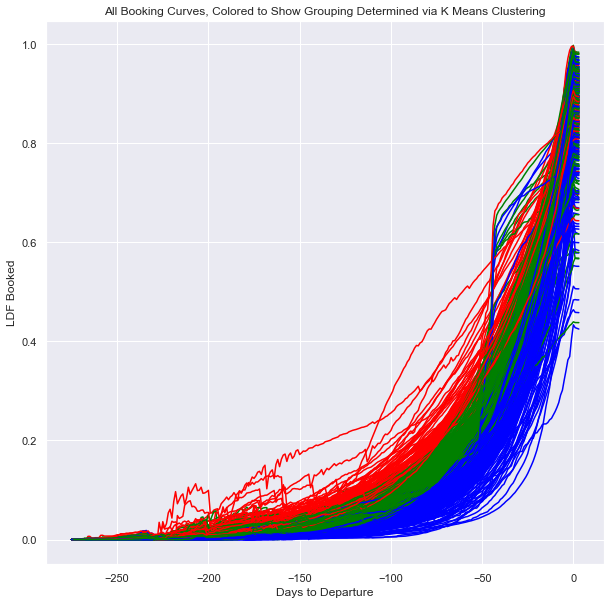

In [30]:
plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['K_MEANS_PRED'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')         
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via K Means Clustering")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

### Comments:

<li>This colorized graph shows a structure and category spread similar to that determined by hierarchial clustering.</li>
<li>This is good, since it indicates that our methods are working similarly, and producing similar results.</li>

### Elbow Plot:

<li>K-Means requires a prespecified number of clusters to work. However, how do we know that is the optimal number of clusters? Maybe the markets would be better represented if there were 4, 5, 6,...,etc., groups? </li>
<li>The elbow plot shows a statistic that measures cluster dissimilarity plotted against the number of clusters.</li>
<li>The goal is to minimize the WCSS statistic without overfitting the data. Meaning, we want WCSS small, but we want to do so with the smallest number of clusters possible.</li>
<li>The optimal number of clusters is inner part of the elbow, or the part where the graph begins to curve to the right and the WCSS statistic begins to taper down.</li>

<Figure size 432x288 with 0 Axes>

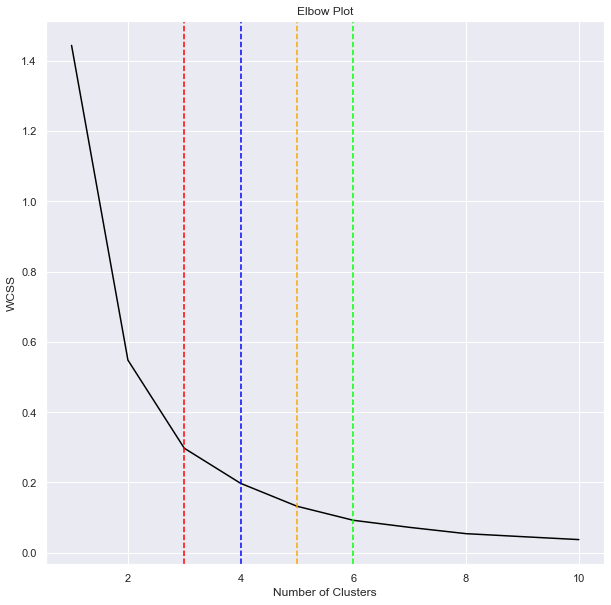

In [31]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_full.iloc[:,1:4])
    wcss.append(kmeans.inertia_)

plt.clf()
plt.figure(figsize=(10, 10))  
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.plot(range(1,11), wcss, color="black")

colors = ['red', 'blue', 'orange', 'lime']

i=0
for c in colors:
    plt.axvline(x=3+i, color=c, ls='--')
    i +=1 
    
plt.show()

### Comments:

<li>Three clusters is right in the crux of the elbow.</li>
<li>4 clusters shows a lower WCSS statistic, and doesn't dramatically increase the complexity of the groupings. Therefore, that may be a better representation of the markets.</li>
<li> Similarly, 5-6 may be explored as an option, too! Beyond that, the increased complexity does not reduce variation enough to warrant the includion of > 6 clusters </li>

### Markets with 4 Clusters:

<Figure size 432x288 with 0 Axes>

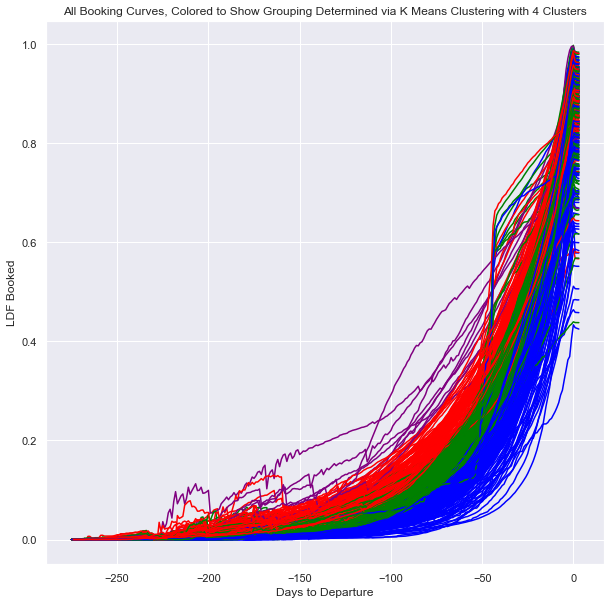

In [34]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
K_MEANS_PRED_4 = kmeans.fit_predict(df_full.iloc[:,1:4])
df_full['K_MEANS_PRED_4'] = K_MEANS_PRED_4

plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['K_MEANS_PRED_4'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 3 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='purple')  
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via K Means Clustering with 4 Clusters")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

In [35]:
pd.Series(K_MEANS_PRED_4).value_counts()

0    173
2    162
1     86
3     10
dtype: int64

### Comments:

<li>Though the purple category is small, it does capture markets thta behave much differently than the rest.</li>
<li>e.g. vacation markets</li>

### K-Means with > 4 Clusters

<li>K-Means is explored below with and 6 clusters.</li>
<li>Adds a fair amount of complexity, but does capture outlying markets fairly well.</li>
<li>Also helps to effectively segment the larger groups that are captured in hierarchial clustering and k-means with 3 and 4 clusters.</li>

### K-Means with 5 Clusters:

<Figure size 432x288 with 0 Axes>

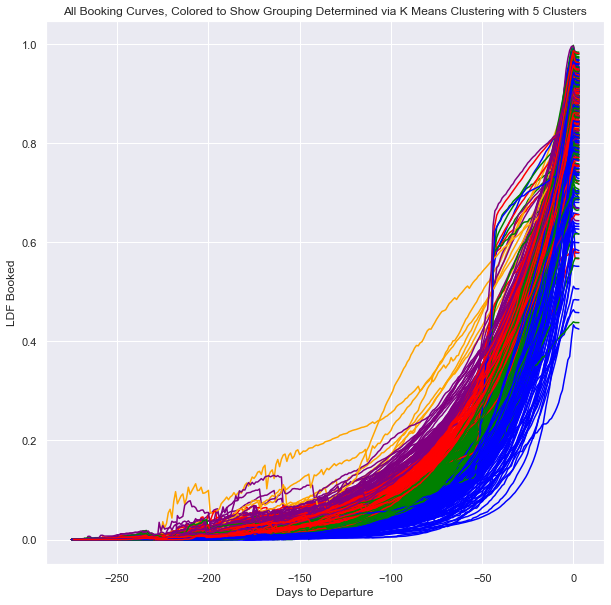

In [37]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
K_MEANS_PRED_5 = kmeans.fit_predict(df_full.iloc[:,1:4])
df_full['K_MEANS_PRED_5'] = K_MEANS_PRED_5

plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['K_MEANS_PRED_5'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 3 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='purple')
        elif 4 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='orange')
        elif 5 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='cyan')
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via K Means Clustering with 5 Clusters")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

In [54]:
pd.Series(K_MEANS_PRED_5).value_counts()

0    148
1    140
2     87
3     49
4      7
dtype: int64

### Comments

<li>Caputres outlying markets (orange lines).</li>
<li>Segments the middle portion of booking curves well (green, purple, red, and blue lines).</li>
<li>Helps to better segment the curves while also capturing the outlying markets.</li>

### K-Means with 6 Clusters:

<Figure size 432x288 with 0 Axes>

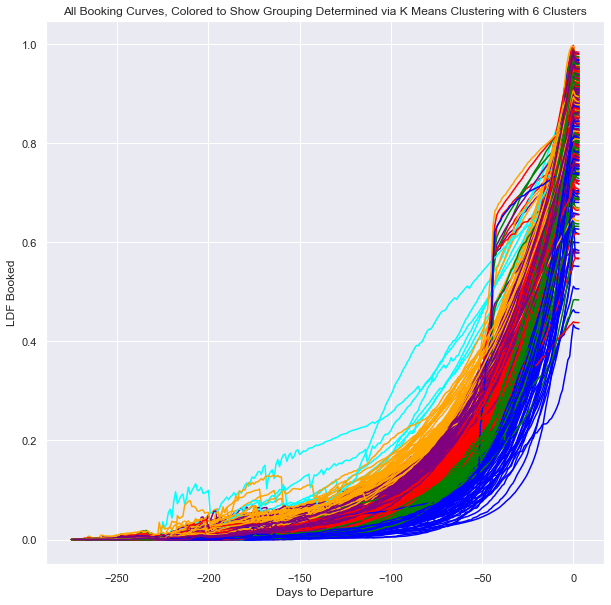

In [42]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
K_MEANS_PRED_6 = kmeans.fit_predict(df_full.iloc[:,1:4])
df_full['K_MEANS_PRED_6'] = K_MEANS_PRED_6

plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['K_MEANS_PRED_6'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='purple')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='cyan')
        elif 3 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 4 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 5 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='orange')
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via K Means Clustering with 6 Clusters")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

In [35]:
pd.Series(K_MEANS_PRED_6).value_counts()

1    125
3    121
0     86
4     49
5     43
2      7
dtype: int64

### Comments:

<li>Captures outlying vacation markets (red lines).</li>
<li>Segments the middle portion of booking curves well (orange, blue, and purple lines).</li>
<li>Segments the lower portion of booking curves well (cyan and green lines).</li>

### Comparing Results:

<li>Below is a visual comparing the plots of the alpha market booking curves, colored to correspond to their behavior category.</li>
<li>This compares the results obtained from hierarchial clustering, K-Means with three clusters, and K-Means with four clusters.</li>

<Figure size 432x288 with 0 Axes>

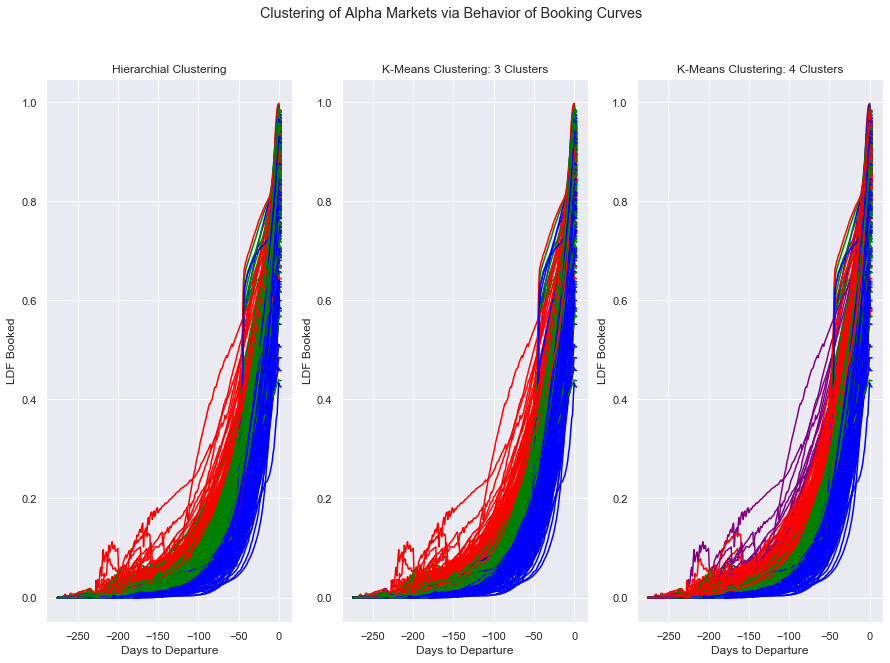

In [44]:
plt.clf()

f, (plot1, plot2, plot3) = plt.subplots(1, 3, figsize=(15,10))

#OUTLIERS = []

for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        
        pred_k_4 = df_full[df_full.ALPHAMKT == str(mkt)]
        pred_k_4 = pred_k_4['K_MEANS_PRED_4'].array[0]
    
        pred_k = df_full[df_full.ALPHAMKT == str(mkt)]
        pred_k = pred_k['K_MEANS_PRED'].array[0]
        
        pred_hcl = df_full[df_full.ALPHAMKT == str(mkt)]
        pred_hcl = pred_hcl['H_CL_PRED'].array[0]
        
        if 0 == pred_hcl:
            plot1.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 1 == pred_hcl:
            plot1.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 2 == pred_hcl:
            plot1.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')    
        
        if 0 == pred_k:
            plot2.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 1 == pred_k:
            plot2.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 2 == pred_k:
            plot2.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red') 
            
        if 0 == pred_k_4:
            plot3.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 1 == pred_k_4:
            plot3.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 2 == pred_k_4:
            plot3.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 3 == pred_k_4:
            #OUTLIERS.append(str(mkt))
            plot3.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='purple')
        
    except KeyError:
        pass

f.suptitle("Clustering of Alpha Markets via Behavior of Booking Curves")
plot1.set_title("Hierarchial Clustering")
plot2.set_title("K-Means Clustering: 3 Clusters")
plot3.set_title("K-Means Clustering: 4 Clusters")

plot1.set(xlabel="Days to Departure", ylabel="LDF Booked")
plot2.set(xlabel="Days to Departure", ylabel="LDF Booked")
plot3.set(xlabel="Days to Departure", ylabel="LDF Booked")

plt.show()

### Comments:

<li>None of the groupings are relatively consistent, and the addition of a fourth grouping does not dramatically alter the other groupings.</li>
<li>Adding a fourth grouping does differentiate between the markets in the larger green category.</li>
<li>There are pretty noticable differences in the rate of changes, and thus the market behavior, within the green cateogry.Some curves have a much higher ROC from 75 DTD to 25 DTD than other markets in this same category.</li>
<li>Since the addition of a fourth grouping does not make the model significantly more complex, nor does it cause it to lose interpretability, this may be a better representation way to represent the markets.</li>
<li>The addition of a 5th and 6th cluster adds complexity, but does segment the middle portion while also grouping the outlying markets together.</li>

## Final Results:

<li>This will show which markets fall into which category!</li>
<li>The results will be shown for the labels obtained through K-Means with 3 and 4 clusters.</li>
<li>Since the results from hierachial clustering and K-Means with 3 clusters are quite similar, for brevity they will be omitted.</li>
<li>tempX['ALPHAMKT'] is commented out, but can be uncommented to be able to see all of the markets.</li>

## K-Means with 3 Clusters: 

<b>Group 1: More Bookings Farther Out</b>
<ul>
    <li>This is the <b>TOP</b> group in the second graph above.</li>
    <li>This correspond to markets that have a large portion of their bookings farther out from the day of departure.</li>
    <li>This would include vacation markets, such as <b>CUNLAS</b></li>
</ul>
<br>
<b>Group 2: Steady Bookings</b>
<ul>
    <li>This is the <b>MIDDLE</b> group in the second graph above.</li>
    <li>This corresponds to markets that some bookings farther out, and book relatively steadily throughout the time leading up to departure.</li>
    <li>This would include markets such as <b>DENPHX</b></li>
</ul>
<br>
<b>Group 3: More Bookings Closer In</b>
<ul>
    <li>This is the <b>BOTTOM</b> group in the second graph above.</li>
    <li>This correspond to markets that have a large portion of their bookings closer towards the day of departure.</li>
    <li>This would include business markets, such as <b>ATLLGA</b></li>
</ul>

## K-Means with 4 Clusters:

In [65]:
#print(OUTLIERS)

['BTVDEN', 'BTVMCO', 'BUFRSW', 'CLESEA', 'CUNLAS', 'DENPVR', 'DFWMCO', 'MCOPUJ', 'MSNPHX', 'OMARSW']


<b>Group 1: Outlying Markets</b>
<ul>
    <li>This is the <b>TOPMOST</b> group in the second graph above.</li>
    <li>This corresponds to markets that are more outlying in beahvior, relative to other markets.</li>
    <li>These markets have a much larger proprotion of bookings farther out than any other markets.</li>
    <li>This includes vacation markets such as <b>BVTMCO</b> and the outer outlying, non-vacation markets shown above.</li>
    <li>BTV is interesting because it is a popular skiing destination, so that could explain the behavior.</li>
</ul>
<br>
<b>Group 2: More Bookings Farther Out</b>
<ul>
    <li>This is the <b>SECOND HIGHEST</b> group in the second graph above.</li>
    <li>This correspond to markets that have a large portion of their bookings farther out from the day of departure.</li>
    <li>This would include vacation markets, such as <b>LASMCO</b></li>
    <li>These markets are more consistent in booking patterns as compared to other markets, and behave differently than other vacation markets encompassed in group 1.</li>
</ul>
<br>
<b>Group 3: Steady Bookings</b>
<ul>
    <li>This is the <b>THIRD HIGHEST</b> group in the second graph above.</li>
    <li>This correspond to markets that have bookings farther out, but overall book steadily up through the time of departure.</li>
    <li>This would include markets, such as <b>DENPHX</b></li>
</ul>
<br>
<b>Group 4: More Bookings Closer In</b>
<ul>
    <li>This is the <b>BOTTOM</b> group in the second graph above.</li>
    <li>This correspond to markets that have a large portion of their bookings closer to the day of departure.</li>
    <li>This would include business-oriented markets, such as <b>ATLLGA</b></li>
</ul>

## Excel Output

<ul>
    <li><b>MAKE SURE THE GROUPS ARE REORDERED BEFORE GENERATING OUTPUT FILES.</b></li>
    <ul>
        <li>K-Means will result in the same alpha markets being groupted together (save for very small amounts of variation).</li>
        <li>However, K-means will randomly label those clusters.</li>
        <li>Running the K-Means model multiple times will result in the same groupings, but those groupings will have different names.</li>
        <li>In addition to manually recoloring the graphs so that they match, THE COLUMNS ON THE OUTPUT FILES NEED TO BE REORDERED TO MAKE SURE THEY MATCH THE GRAPHS.</li>
        <li><b>Groups should be listed in a top-down pattern</b>, with the topmost group as group 1, ...,etc.</li>
    </ul>
    <li>See 'READ ME BEFORE RUNNING NOTEBOOKS.TXT' in directory</li>
</ul>

In [66]:
temp1 = df_full[df_full.K_MEANS_PRED ==0]
g3_1 = pd.Series(list(temp1['ALPHAMKT'])).sort_values(ascending=True)

temp2 = df_full[df_full.K_MEANS_PRED ==1]
g3_2 = pd.Series(list(temp2['ALPHAMKT'])).sort_values(ascending=True)

temp3 = df_full[df_full.K_MEANS_PRED ==2]
g3_3 = pd.Series(list(temp3['ALPHAMKT'])).sort_values(ascending=True)

In [67]:
temp4 = df_full[df_full.K_MEANS_PRED_4 ==0]
g4_1 = pd.Series(list(temp4['ALPHAMKT'])).sort_values(ascending=True)

temp5 = df_full[df_full.K_MEANS_PRED_4 ==1]
g4_2 = pd.Series(list(temp5['ALPHAMKT'])).sort_values(ascending=True)

temp6 = df_full[df_full.K_MEANS_PRED_4 ==2]
g4_3 = pd.Series(list(temp6['ALPHAMKT'])).sort_values(ascending=True)

temp7 = df_full[df_full.K_MEANS_PRED_4 ==3]
g4_4 = pd.Series(list(temp7['ALPHAMKT'])).sort_values(ascending=True)

<li>Output files are sent to the same folder that contains the raw version of this notebook and queries.</li>
<li>Filepath can be adjusted to place the output files wherever is preferable!</li>

In [69]:
KMEANS3_CLUSTER_ASSIGNMENTS = pd.concat([g3_3, g3_2, g3_1], ignore_index=True, axis=1)
KMEANS3_CLUSTER_ASSIGNMENTS.columns  = ['GROUP_1', 'GROUP_2', 'GROUP_3']

KMEANS4_CLUSTER_ASSIGNMENTS = pd.concat([g4_4, g4_2, g4_1,  g4_3], ignore_index=True, axis=1)
KMEANS4_CLUSTER_ASSIGNMENTS.columns  = ['GROUP_1', 'GROUP_2', 'GROUP_3', 'GROUP_4']

KMEANS3_CLUSTER_ASSIGNMENTS.to_excel('KMEANS-3-GROUPINGS-LDF.xlsx', index=False)
KMEANS4_CLUSTER_ASSIGNMENTS.to_excel('KMEANS-4-GROUPINGS-LDF.xlsx', index=False)